<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/LinearRegression_ML_BostonHousePricing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Practical Implementation of Linear Regression modal on house_pricing dataset **


In [47]:
# import all libraries -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# divide the dataset into independent and depenedent feature's ---> { i.e X and y }
# URL of the Boston Housing dataset CSV file
csv_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# Load the dataset into a DataFrame
df_boston = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df_boston.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [49]:
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [50]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [51]:
## Independent features and dependent features
X = df_boston.drop('medv', axis=1)
y = df_boston['medv']

In [52]:
# dataframe format -->
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [53]:
y.tail()

,medv
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [54]:
y_new = np.array(y)
y_new

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [55]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [56]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [57]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [58]:
y_train

,medv
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
360,25.0
3,33.4
405,5.0
185,29.6
60,18.7


In [59]:
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
76,20.0
316,17.8
140,14.0
471,19.6
500,16.8


** Steps to implement Linear Regression **

In [61]:
## Step1 -> standardizing the dataset --> Data Scaling  {Gradient Descent}
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [63]:
# to get back original values of X_train
scaler.inverse_transform(X_train)

array([[3.71776356e+00, 1.14039548e+01, 2.62379296e+01, ...,
        6.04203300e+01, 3.45700735e+04, 4.94243714e+01],
       [4.56253732e+00, 1.14039548e+01, 8.04907737e+01, ...,
        5.83920879e+01, 3.44988960e+04, 9.79334192e+01],
       [4.89337175e+00, 1.14039548e+01, 5.90113591e+01, ...,
        5.86174481e+01, 3.48113829e+04, 8.49361194e+01],
       ...,
       [3.59453106e+00, 1.81752404e+03, 2.50600262e+01, ...,
        5.65892060e+01, 3.42940434e+04, 5.49642041e+01],
       [9.61467082e+01, 1.14039548e+01, 1.36545117e+02, ...,
        6.38007335e+01, 9.89489244e+03, 1.77692805e+02],
       [5.36952753e+00, 1.14039548e+01, 7.04439507e+01, ...,
        6.53782552e+01, 6.50527757e+03, 8.79191062e+01]])

In [66]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
# documentation -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Syntax --> class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
# parameters -->
# fit_intercept : boolean, optional (default=True) --> Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
# copy_X : boolean, optional (default=True) --> If True, X will be copied; else, it may be overwritten.
# n_jobs : int or None, optional (default=None) --> The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
# positive : boolean, optional (default=False) --> When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [67]:
# Step2 --> import linear regression from linear model under sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)       # here we have multiple i/p feature's --> multi-linear Regression problem

LinearRegression()

In [70]:
# here in LR we have 3-4 parameters only so how we can perform hyper-parameter tuning -> one way use rich and lasso regression
# second way --> use cross-validation technique { we basically internally train data is divided into sub-parts {different train_test-splits} -> then finally atlast m uska mean calculate krte h}

# cross-validation -->
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10 , scoring='neg_mean_squared_error')
scores


array([-20.96899446, -28.56556055, -48.78676527, -17.90181938,
       -27.86935858, -24.85480776, -18.65321599, -18.02764879,
       -13.94804652, -35.9303906 ])

In [72]:
np.mean(scores)   # after perfroming CV our mse {difference btw predicted and truth value} is good {it should be minimum} -->

-25.550660791660828

In [73]:
# Step3 -> make predictions on Testing data
y_pred = model.predict(X_test)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

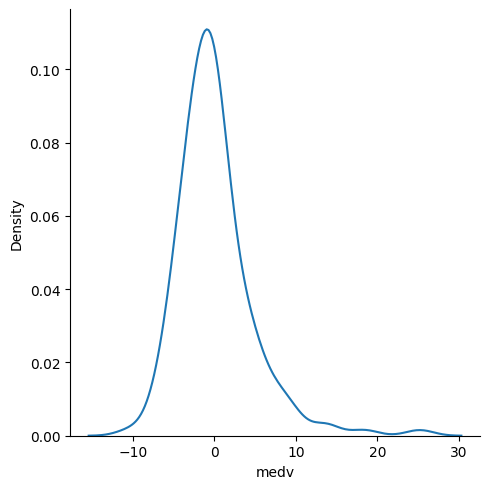

In [76]:
# step4 -> modal evaluation {make comparison with truth values (y_test)}
sns.displot(y_test-y_pred, kind = 'kde')          # variance is less as most points lie btw -10 and 10 {rest of difference is btw -10 to 10} and remaining outliers difference is high

In [77]:
# Step5 --> calculate modal performance in terms of mse , rmse , r2_score of y_pred w.r.t y_test

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

21.517444231177183
3.1627098714574013
0.7112260057484936


In [79]:
r2_score(y_test,y_pred)

0.7112260057484936